In [1]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [ ]:
dados.head()

In [ ]:
dados.sample(10)

In [2]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
dados["Bairro"][6522]

In [ ]:
dados.Metragem.mean()

In [ ]:
dados["Metragem"].mean()

In [ ]:
sum((dados["Bairro"] == "Vila Mariana"))

In [ ]:
tem_imoveis_vila =( dados["Bairro"] == "Vila Mariana")
tem_imoveis_vila

In [ ]:
imoveis_vila_mariana = dados[tem_imoveis_vila]
imoveis_vila_mariana

In [ ]:
imoveis_vila_mariana["Metragem"].mean()

In [ ]:
dados["Bairro"].value_counts()

In [ ]:
n_imoveis_bairro = dados["Bairro"].value_counts()
n_imoveis_bairro.head(10).plot.bar()

Desafios:

1 - Realizar a média da metragem para cara um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [ ]:
# 1) Realizar a média da metragem para cara um dos bairros

# Usando o método groupby, foi agrupado a coluna que quero (nesse caso o [Bairro]) e tiro a média (por causa do .mean() no final) 
# das outras selecionadas (nesse caso a ['Metragem']). Se as_index fosse True, os nomes dos bairros se tornariam o indíce.
# Usando as_index como False, os números continuam sendo o indíce. 

metragem_bairro = dados[['Bairro', 'Metragem']].groupby('Bairro', as_index=False).mean()
metragem_bairro

In [ ]:
# 2) 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas

# A primeira forma é usando o == e filtrando o bairro que deseja 
a = dados[dados["Bairro"] == "Vila Mariana"]
a

In [ ]:
# A segunda é usando a função query e filtrando apenas o bairro que quero

b = dados.query('Bairro == "Vila Mariana"')
b

In [14]:
# Usando o str.contains() é possível verificar se existe um pedaço da palavra, como por exemplo os bairros que começam com vila

c = dados[dados['Bairro'].str.contains('Vila')]
c

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000
10,"Rua Vigário João Álvares, 66",Vila Monumento,São Paulo,261,4,4,3,R$ 700.000
12,"Rua Tuim, 449",Vila Uberabinha,São Paulo,193,3,3,2,R$ 2.500.000
16,Rua João Tauler,Vila Nova,São Paulo,180,4,2,4,R$ 420.000
19,"Avenida Antônio Joaquim de Moura Andrade, 294",Vila Nova Conceição,São Paulo,605,3,3,4,R$ 4.190.000
...,...,...,...,...,...,...,...,...
10001,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,R$ 960.000
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


<AxesSubplot:xlabel='Quartos', ylabel='Banheiros'>

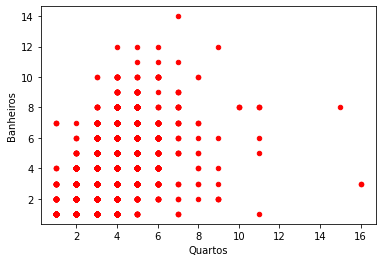

In [15]:
# 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão

img = dados[['Quartos', 'Banheiros']]
img.plot.scatter(x='Quartos', y='Banheiros', c='red')

In [ ]:
#4) Pegar outros estatísticas dos dados, média, mediana, mim, max 

print(f'A média da metragem é {dados["Metragem"].mean()}')
print(f'A mediana da metragem é {dados["Metragem"].median()}')
print(f'O valor máximo da metragem é {dados["Metragem"].max()}')
print(f'O valor mínimo da metragem é {dados["Metragem"].min()}')

In [7]:
#5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

sem_rua = dados['Rua'].isnull()
dados_sem_rua = dados[sem_rua]
dados_sem_rua['Bairro'].unique()

array(['Jardim Morumbi', 'Jardim Luzitânia', 'Parque da Lapa',
       'Chácara Santo Antônio (Zona Sul)', 'Jardim Guedala',
       'Vila Arriete', 'Alto de Pinheiros', 'Planalto Paulista',
       'Vila Moinho Velho', 'Brooklin Paulista', 'Sumaré',
       'Jardim Paulista', 'Vila Gustavo', 'Jardim Trussardi',
       'Vila Madalena', 'Jardim dos Estados', 'Vila Santos',
       'Jardim Europa', 'Butantã', 'Jardim Paulistano',
       'Jardim Petrópolis', 'Vila Mariana', 'Vila Aparecida', 'Siciliano',
       'Alto da Lapa', 'Jardim da Glória', 'Morumbi', 'Vila Ida',
       'Cidade Jardim', 'Cidade Dutra', 'Água Fria', 'Parque Boturussu',
       'Belenzinho', 'Vila Sônia', 'Jardim Panorama', 'Jardim Ampliação',
       'Lauzane Paulista', 'Vila Sabrina', 'Vila Olímpia',
       'Jardim Franca', 'Jardim Sílvia (Zona Oeste)', 'Santo Amaro',
       'Mooca', 'Jardim América', 'Interlagos', 'Pacaembu',
       'Jardim Santo Amaro', 'Vila Matilde', 'Vila Prudente',
       'Vila Nova Conceição', 'Jard

In [8]:
len(dados_sem_rua['Bairro'].unique())

394

In [9]:
len(dados['Bairro'].unique())

702